In [1]:
#!git clone https://github.com/EimantasN/clothing-size-identification.git

### Extracting object count and coverage from images

In [2]:
from skimage import io, filters
from scipy import ndimage
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

In [3]:
!ls ./imgs

DSC_2700.JPG  DSC_2726.JPG  IMG_9321.jpg  IMG_9357.jpg	IMG_9410.jpg
DSC_2701.JPG  DSC_2727.JPG  IMG_9322.jpg  IMG_9360.jpg	IMG_9414.jpg
DSC_2702.JPG  DSC_2728.JPG  IMG_9325.jpg  IMG_9364.jpg	IMG_9415.jpg
DSC_2703.JPG  DSC_2729.JPG  IMG_9326.jpg  IMG_9369.jpg	IMG_9416.jpg
DSC_2704.JPG  DSC_2730.JPG  IMG_9329.jpg  IMG_9370.jpg	IMG_9417.jpg
DSC_2705.JPG  DSC_2732.JPG  IMG_9330.jpg  IMG_9373.jpg	IMG_9418.jpg
DSC_2706.JPG  DSC_2735.JPG  IMG_9331.jpg  IMG_9374.jpg	IMG_9419.jpg
DSC_2707.JPG  DSC_2736.JPG  IMG_9335.jpg  IMG_9377.jpg	IMG_9420.jpg
DSC_2708.JPG  IMG_9263.jpg  IMG_9336.jpg  IMG_9378.jpg	IMG_9421.jpg
DSC_2709.JPG  IMG_9267.jpg  IMG_9337.jpg  IMG_9379.jpg	IMG_9422.jpg
DSC_2710.JPG  IMG_9272.jpg  IMG_9338.jpg  IMG_9382.jpg	IMG_9423.jpg
DSC_2711.JPG  IMG_9279.jpg  IMG_9339.jpg  IMG_9384.jpg	IMG_9424.jpg
DSC_2712.JPG  IMG_9283.jpg  IMG_9340.jpg  IMG_9385.jpg	IMG_9425.jpg
DSC_2713.JPG  IMG_9286.jpg  IMG_9341.jpg  IMG_9386.jpg	IMG_9426.jpg
DSC_2714.JPG  IMG_9290.jpg  IMG_9342.jpg  IMG_93

In [4]:
sampleImage = './imgs/IMG_9350.jpg'

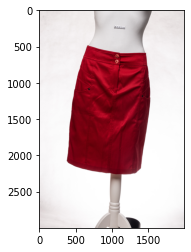

In [5]:
plt.imshow(io.imread(sampleImage), cmap='gray')
plt.show()

In [6]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

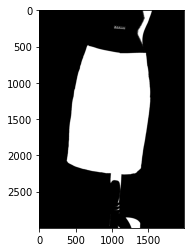

In [7]:
im = io.imread(sampleImage)
im = rgb2gray(im)
val = filters.threshold_otsu(im)
drops = ndimage.binary_fill_holes(im < val)
plt.imshow(drops, cmap='gray')
plt.show()

In [8]:
print('coverage is %f' %(drops.mean()))

coverage is 0.292516


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

374


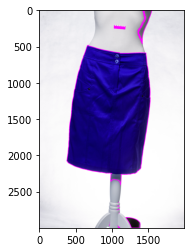

In [10]:
img = cv2.imread(sampleImage)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,1)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]

for cnt in contours:
    cv2.drawContours(img,[cnt],0,(255,0,255),8)
    
print(len(contours))
    
plt.imshow(img, cmap='gray')
plt.show()

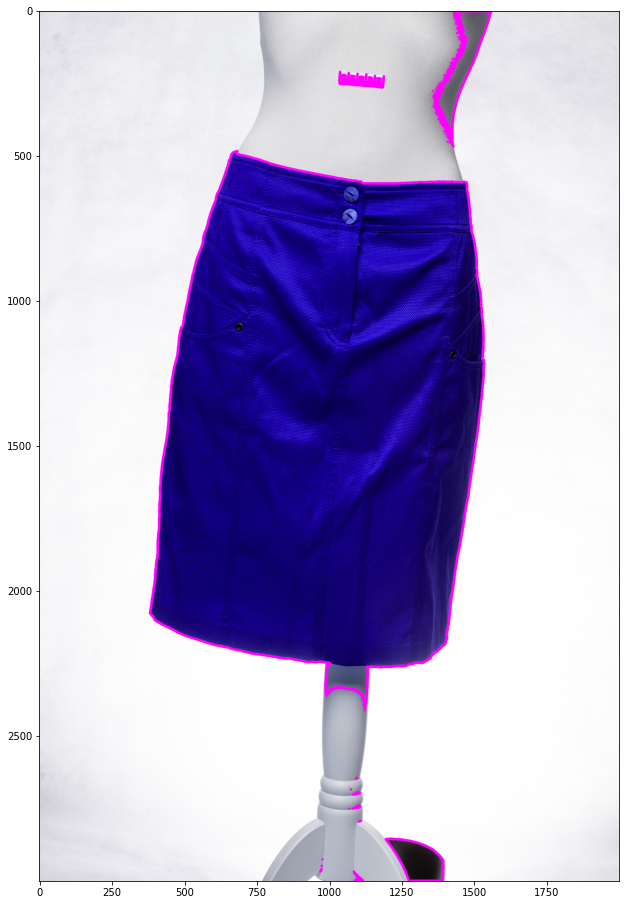

In [11]:

plt.figure(figsize = (16,16))
plt.imshow(img)

In [12]:
print(contours)

[array([[[1104, 2987]],

       [[1104, 2988]],

       [[1103, 2989]],

       [[1103, 2990]],

       [[1099, 2994]],

       [[1098, 2993]],

       [[1098, 2992]],

       [[1099, 2991]],

       [[1097, 2993]],

       [[1096, 2992]],

       [[1096, 2991]],

       [[1096, 2992]],

       [[1097, 2993]],

       [[1095, 2995]],

       [[1094, 2995]],

       [[1092, 2997]],

       [[1091, 2997]],

       [[1089, 2999]],

       [[1090, 2999]],

       [[1091, 2998]],

       [[1092, 2999]],

       [[1117, 2999]],

       [[1112, 2994]],

       [[1112, 2993]],

       [[1111, 2993]],

       [[1105, 2987]]], dtype=int32), array([[[1101, 2984]]], dtype=int32), array([[[1099, 2982]]], dtype=int32), array([[[1096, 2982]],

       [[1095, 2983]],

       [[1096, 2983]]], dtype=int32), array([[[1092, 2980]],

       [[1093, 2980]]], dtype=int32), array([[[1085, 2967]],

       [[1086, 2968]],

       [[1086, 2969]],

       [[1087, 2970]],

       [[1087, 2971]],

       [[1089, 29

In [ ]:
import cv2

#-----Reading the image-----------------------------------------------------
img = cv2.imread(sampleImage, 1)
cv2.imshow("img",img) 

#-----Converting image to LAB Color model----------------------------------- 
lab= cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2.imshow("lab",lab)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
cv2.imshow('l_channel', l)
cv2.imshow('a_channel', a)
cv2.imshow('b_channel', b)

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
cv2.imshow('CLAHE output', cl)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
cv2.imshow('limg', limg)

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
cv2.imshow('final', final)

#_____END_____#